<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/time_series_analysis_tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pylab

#pylab.rcParams['figure.figsize'] = (10., 15.)
sns.set(font_scale=1.5)
sns.set_style("white")


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tourism in Spain Large Dataset.xlsx to Tourism in Spain Large Dataset (2).xlsx


In [3]:
excel_file = 'Tourism in Spain Large Dataset.xlsx'
csv_file = 'Tourism in Spain Large Dataset.csv'  # Choose a name for your CSV file

# Read the Excel file
df = pd.read_excel(excel_file)

# Save as CSV
df.to_csv('Tourism in Spain Large Dataset.csv', index=False)  # index=False prevents saving row numbers

In [4]:
df = pd.read_csv('Tourism in Spain Large Dataset.csv')

In [5]:
df.head()

,Year,Autonomous\nCommunity,International Leisure\n Tourists,Domestic \nTravels,International Leisure\n Tourists (Millions),Domestic\n Travels\n(Millions),International Tourists \n(all reasons),Ratio of International Tourists to Domestic Travels,Unemployment \nRate (%),GDP per\n Capita (€),Annual Avg. Housing\n Price Index\n(Base 2015),Total Urban Waste Collected without RCD (Tonnes),Total Urban Waste Collected with RCD (Tonnes),"Trade, Transportation, Hotels & Restaurants and Leisure Sector \nPercentage (%)",Unnamed: 14,Sources
0,2016,Andalusia,9007656.0,31761512.0,9.007656,31.761512,1.058964e+07,NaN,29.7,17865.0,102.841,4302034.0,4395591.0,NaN,NaN,Industry Sector: https://www.caixabankresearch...
1,2016,Aragón,364836.0,8011707.0,0.364836,8.011707,6.445165e+05,NaN,15.3,26243.0,101.896,527188.0,529040.0,NaN,NaN,International Tourists: https://www.dataestur....
2,2016,Balearic Islands,12410527.0,3237272.0,12.410527,3.237272,1.299755e+07,NaN,18.4,26922.0,106.176,840387.0,846128.0,NaN,NaN,Domestic Travels & Expenditure: https://www.in...
3,2016,Basque Country,959350.0,4855953.0,0.959350,4.855953,1.382083e+06,NaN,12.8,30833.0,102.574,966673.0,987223.0,NaN,NaN,Unemployment Rates: https://www.ine.es/jaxiT3/...
4,2016,Canary Islands,12956111.0,5712319.0,12.956111,5.712319,1.325957e+07,NaN,26.0,19450.0,103.344,1217266.0,1245102.0,NaN,NaN,GDP per Capita: https://www.ine.es/dyngs/INEba...


In [6]:
df.columns

Index(['Year', 'Autonomous\nCommunity', 'International Leisure\n Tourists ',
       'Domestic \nTravels ', 'International Leisure\n Tourists (Millions) ',
       'Domestic\n Travels\n(Millions)',
       'International Tourists \n(all reasons)',
       'Ratio of International Tourists to Domestic Travels',
       'Unemployment \nRate (%)', 'GDP per\n Capita (€)',
       'Annual Avg. Housing\n Price Index\n(Base 2015)',
       'Total Urban Waste Collected without RCD (Tonnes)',
       'Total Urban Waste Collected with RCD (Tonnes)',
       'Trade, Transportation, Hotels & Restaurants and Leisure Sector \nPercentage (%)',
       'Unnamed: 14', 'Sources'],
      dtype='object')

In [7]:
df.rename(
    columns={
        'Autonomous\nCommunity': 'Autonomous Community',
        'International Leisure\n Tourists ': 'International Leisure Tourists',
        'Domestic \nTravels ': 'Domestic Travels',
        'International Leisure\n Tourists (Millions) ': 'International Leisure Tourists (millions)',
        'International Tourists \n(all reasons)': 'International Tourists (all)',
        'Unemployment \nRate (%)': 'Unemployment Rate',
        'GDP per\n Capita (€)': 'GDP per capita',
        'Annual Avg. Housing\n Price Index\n(Base 2015)': 'Annual Average HPI',
        'Total_Urban_Waste_Collected_without_RCD': 'Total Urban Waste Collected without RCD',
        'Total_Urban_Waste_Collected_with_RCD': 'Total Urban Waste Collected with RCD',
    },
    inplace=True
)

In [8]:
df_filtered = df[
    (df['Year'] >= 2016) &
    (df['Year'] <= 2023)
].copy()

In [9]:
df_filtered

,Year,Autonomous Community,International Leisure Tourists,Domestic Travels,International Leisure Tourists (millions),Domestic\n Travels\n(Millions),International Tourists (all),Ratio of International Tourists to Domestic Travels,Unemployment Rate,GDP per capita,Annual Average HPI,Total Urban Waste Collected without RCD (Tonnes),Total Urban Waste Collected with RCD (Tonnes),"Trade, Transportation, Hotels & Restaurants and Leisure Sector \nPercentage (%)",Unnamed: 14,Sources
0,2016,Andalusia,9.007656e+06,31761512.0,9.007656,31.761512,1.058964e+07,NaN,29.7,17865.0,102.841,4302034.0,4395591.0,NaN,NaN,Industry Sector: https://www.caixabankresearch...
1,2016,Aragón,3.648360e+05,8011707.0,0.364836,8.011707,6.445165e+05,NaN,15.3,26243.0,101.896,527188.0,529040.0,NaN,NaN,International Tourists: https://www.dataestur....
2,2016,Balearic Islands,1.241053e+07,3237272.0,12.410527,3.237272,1.299755e+07,NaN,18.4,26922.0,106.176,840387.0,846128.0,NaN,NaN,Domestic Travels & Expenditure: https://www.in...
3,2016,Basque Country,9.593500e+05,4855953.0,0.959350,4.855953,1.382083e+06,NaN,12.8,30833.0,102.574,966673.0,987223.0,NaN,NaN,Unemployment Rates: https://www.ine.es/jaxiT3/...
4,2016,Canary Islands,1.295611e+07,5712319.0,12.956111,5.712319,1.325957e+07,NaN,26.0,19450.0,103.344,1217266.0,1245102.0,NaN,NaN,GDP per Capita: https://www.ine.es/dyngs/INEba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2023,Murcia Region,7.571153e+05,3934235.0,0.757115,3.934235,9.934421e+05,NaN,13.5,25887.0,132.505,NaN,NaN,NaN,NaN,NaN
140,2023,Navarre AC,2.560108e+05,2227033.0,0.256011,2.227033,3.700890e+05,NaN,12.1,37088.0,132.566,NaN,NaN,NaN,NaN,NaN
141,2023,Principality of Asturias,2.730165e+05,4758797.0,0.273016,4.758797,3.839082e+05,NaN,13.1,28130.0,130.901,NaN,NaN,NaN,NaN,NaN
142,2023,Valencian AC,8.900242e+06,18477734.0,8.900242,18.477734,1.049185e+07,NaN,13.8,26453.0,135.921,NaN,NaN,NaN,NaN,NaN


In [54]:
# List the columns you want to remove
columns_to_drop = ['Trade, Transportation, Hotels & Restaurants and Leisure Sector \nPercentage (%)',
       'Unnamed: 14', 'Sources']

# Drop the specified columns (axis=1 indicates columns)
df_fully_filtered = df.drop(columns=columns_to_drop, axis=1)

In [55]:
df_fully_filtered['International Tourists (all) (millions)'] = df_fully_filtered['International Tourists (all)'] / 1000000

In [56]:
df_fully_filtered

,Year,Autonomous Community,International Leisure Tourists,Domestic Travels,International Leisure Tourists (millions),Domestic\n Travels\n(Millions),International Tourists (all),Ratio of International Tourists to Domestic Travels,Unemployment Rate,GDP per capita,Annual Average HPI,Total Urban Waste Collected without RCD (Tonnes),Total Urban Waste Collected with RCD (Tonnes),International Tourists (all) (millions)
0,2016,Andalusia,9.007656e+06,31761512.0,9.007656,31.761512,1.058964e+07,NaN,29.7,17865.0,102.841,4302034.0,4395591.0,10.589642
1,2016,Aragón,3.648360e+05,8011707.0,0.364836,8.011707,6.445165e+05,NaN,15.3,26243.0,101.896,527188.0,529040.0,0.644516
2,2016,Balearic Islands,1.241053e+07,3237272.0,12.410527,3.237272,1.299755e+07,NaN,18.4,26922.0,106.176,840387.0,846128.0,12.997549
3,2016,Basque Country,9.593500e+05,4855953.0,0.959350,4.855953,1.382083e+06,NaN,12.8,30833.0,102.574,966673.0,987223.0,1.382083
4,2016,Canary Islands,1.295611e+07,5712319.0,12.956111,5.712319,1.325957e+07,NaN,26.0,19450.0,103.344,1217266.0,1245102.0,13.259567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2024,Murcia Region,8.019470e+05,NaN,0.801947,NaN,1.012695e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.012695
158,2024,Navarre AC,3.308608e+05,NaN,0.330861,NaN,4.493619e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.449362
159,2024,Principality of Asturias,1.975393e+05,NaN,0.197539,NaN,2.891970e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.289197
160,2024,Valencian AC,8.974890e+06,NaN,8.974890,NaN,1.059015e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.590149


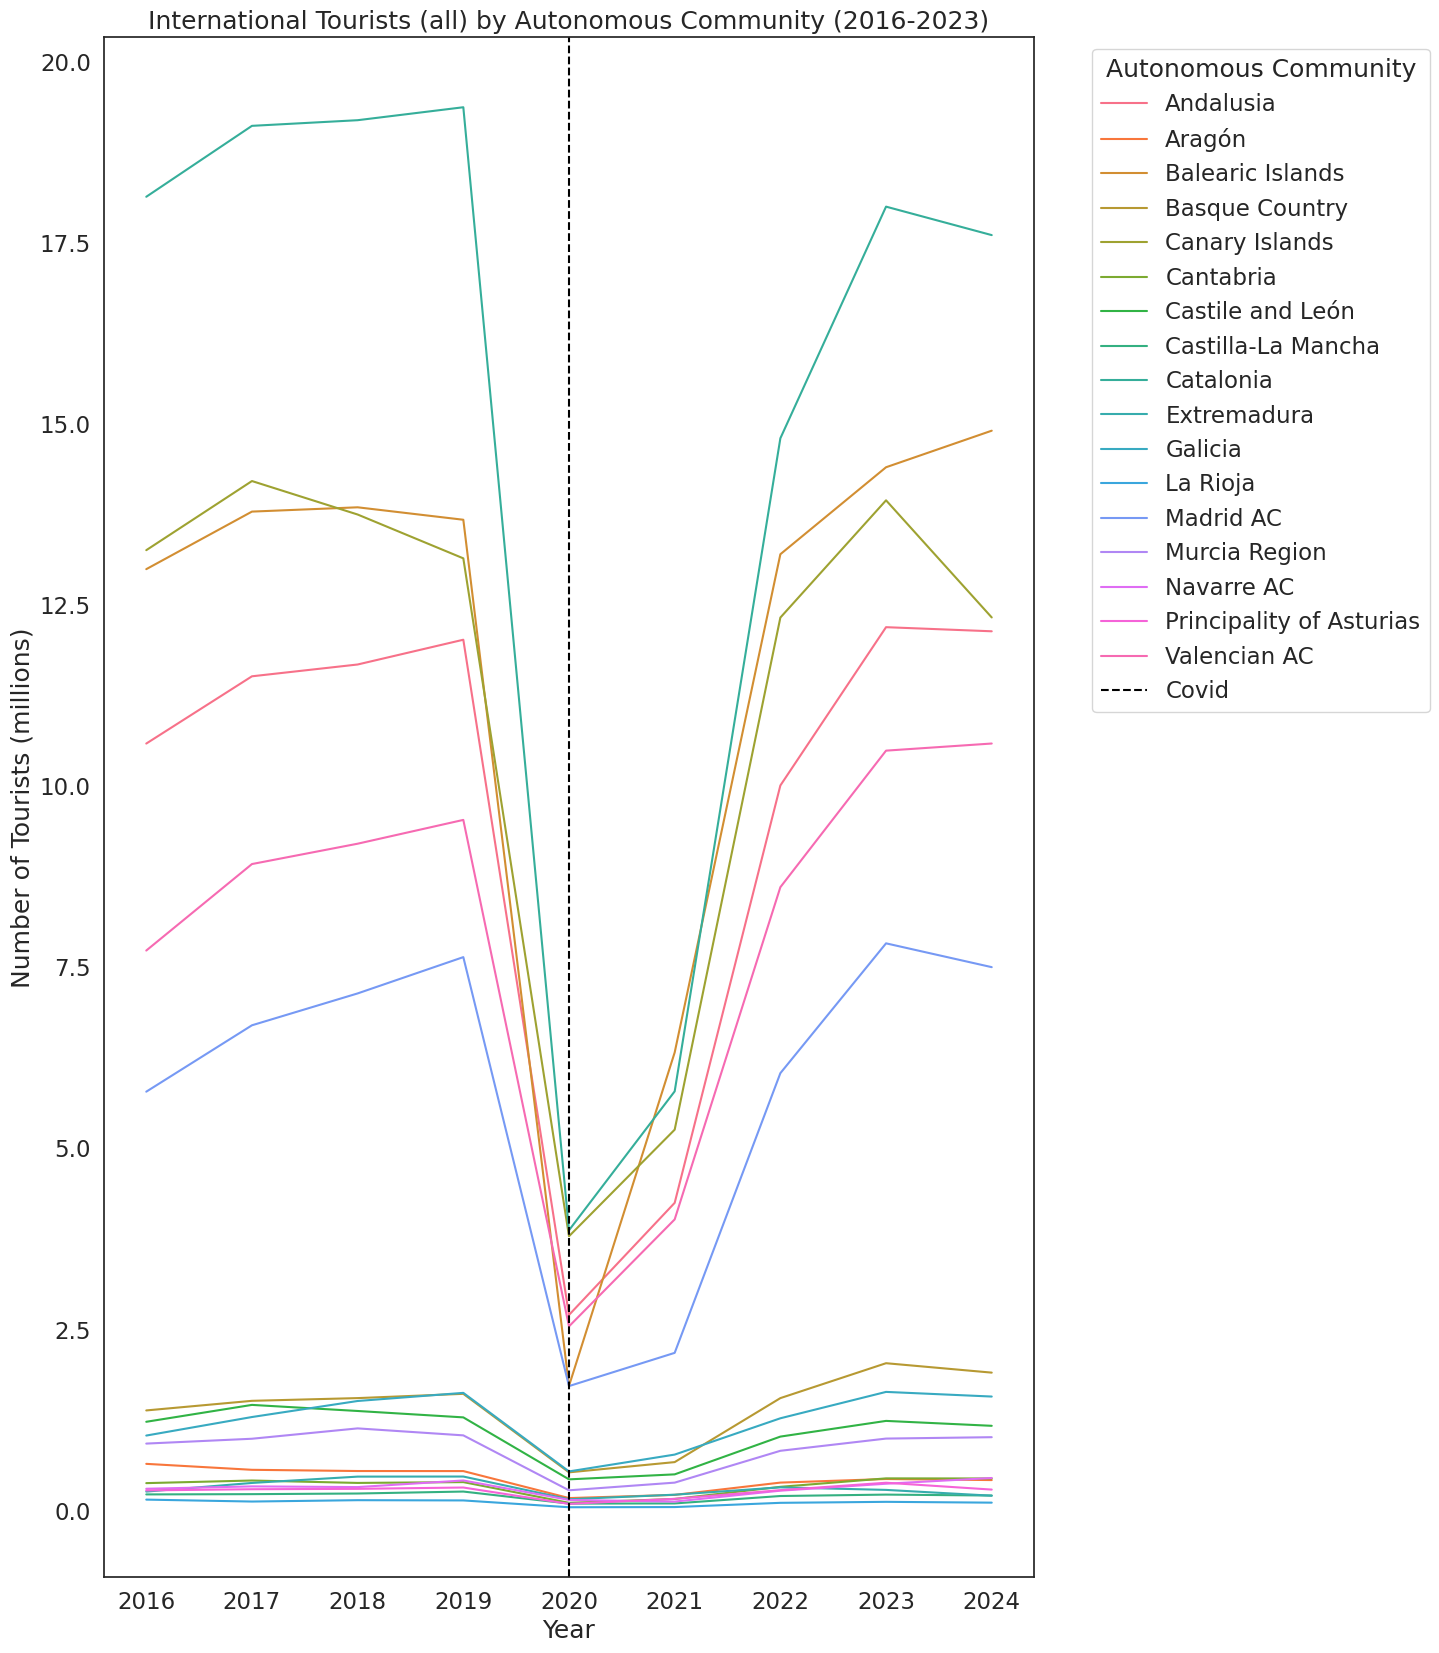

In [58]:
pylab.rcParams['figure.figsize'] = (12, 20)

sns.lineplot(data=df_fully_filtered[df_fully_filtered['Autonomous Community'] != 'National Total'], x='Year', y='International Tourists (all) (millions)', hue='Autonomous Community')

# Customize the plot
plt.title('International Tourists (all) by Autonomous Community (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (millions)')

# Highlight Covid
plt.axvline(x=2020,color='black',linestyle='dashed', label='Covid')

plt.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.figure(figsize=(12, 20))


# Display the plot
plt.show()

In [60]:
communities_ranked_by_total_tourists = df_fully_filtered.groupby('Autonomous Community')['International Tourists (all) (millions)'].sum().sort_values(ascending=False)

print(communities_ranked_by_total_tourists)

Autonomous Community
National Total              613.026519
Catalonia                   135.904250
Balearic Islands            104.884678
Canary Islands              102.026857
Andalusia                    87.108304
Valencian AC                 71.651295
Madrid AC                    52.531608
Basque Country               12.746792
Galicia                      11.261369
Castile and León              9.702496
Murcia Region                 7.582943
Aragón                        3.926584
Cantabria                     3.047052
Extremadura                   2.764754
Navarre AC                    2.736331
Principality of Asturias      2.397590
Castilla-La Mancha            1.767565
La Rioja                      0.986049
Name: International Tourists (all) (millions), dtype: float64


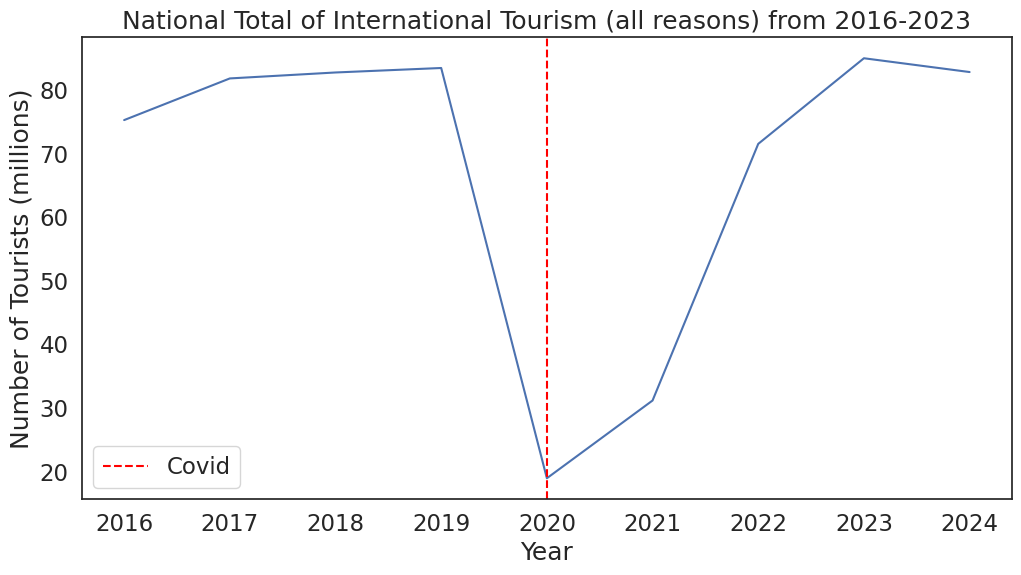

In [65]:
pylab.rcParams['figure.figsize'] = (12, 6)

sns.lineplot(data=df_fully_filtered[df_fully_filtered['Autonomous Community'] == 'National Total'], x='Year', y='International Tourists (all) (millions)')

# Customize the plot
plt.title('National Total of International Tourism (all reasons) from 2016-2023')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (millions)')

# Highlight Covid
plt.axvline(x=2020,color='red',linestyle='dashed', label='Covid')

plt.legend()
#plt.figure(figsize=(10, 10))


# Display the plot
plt.show()

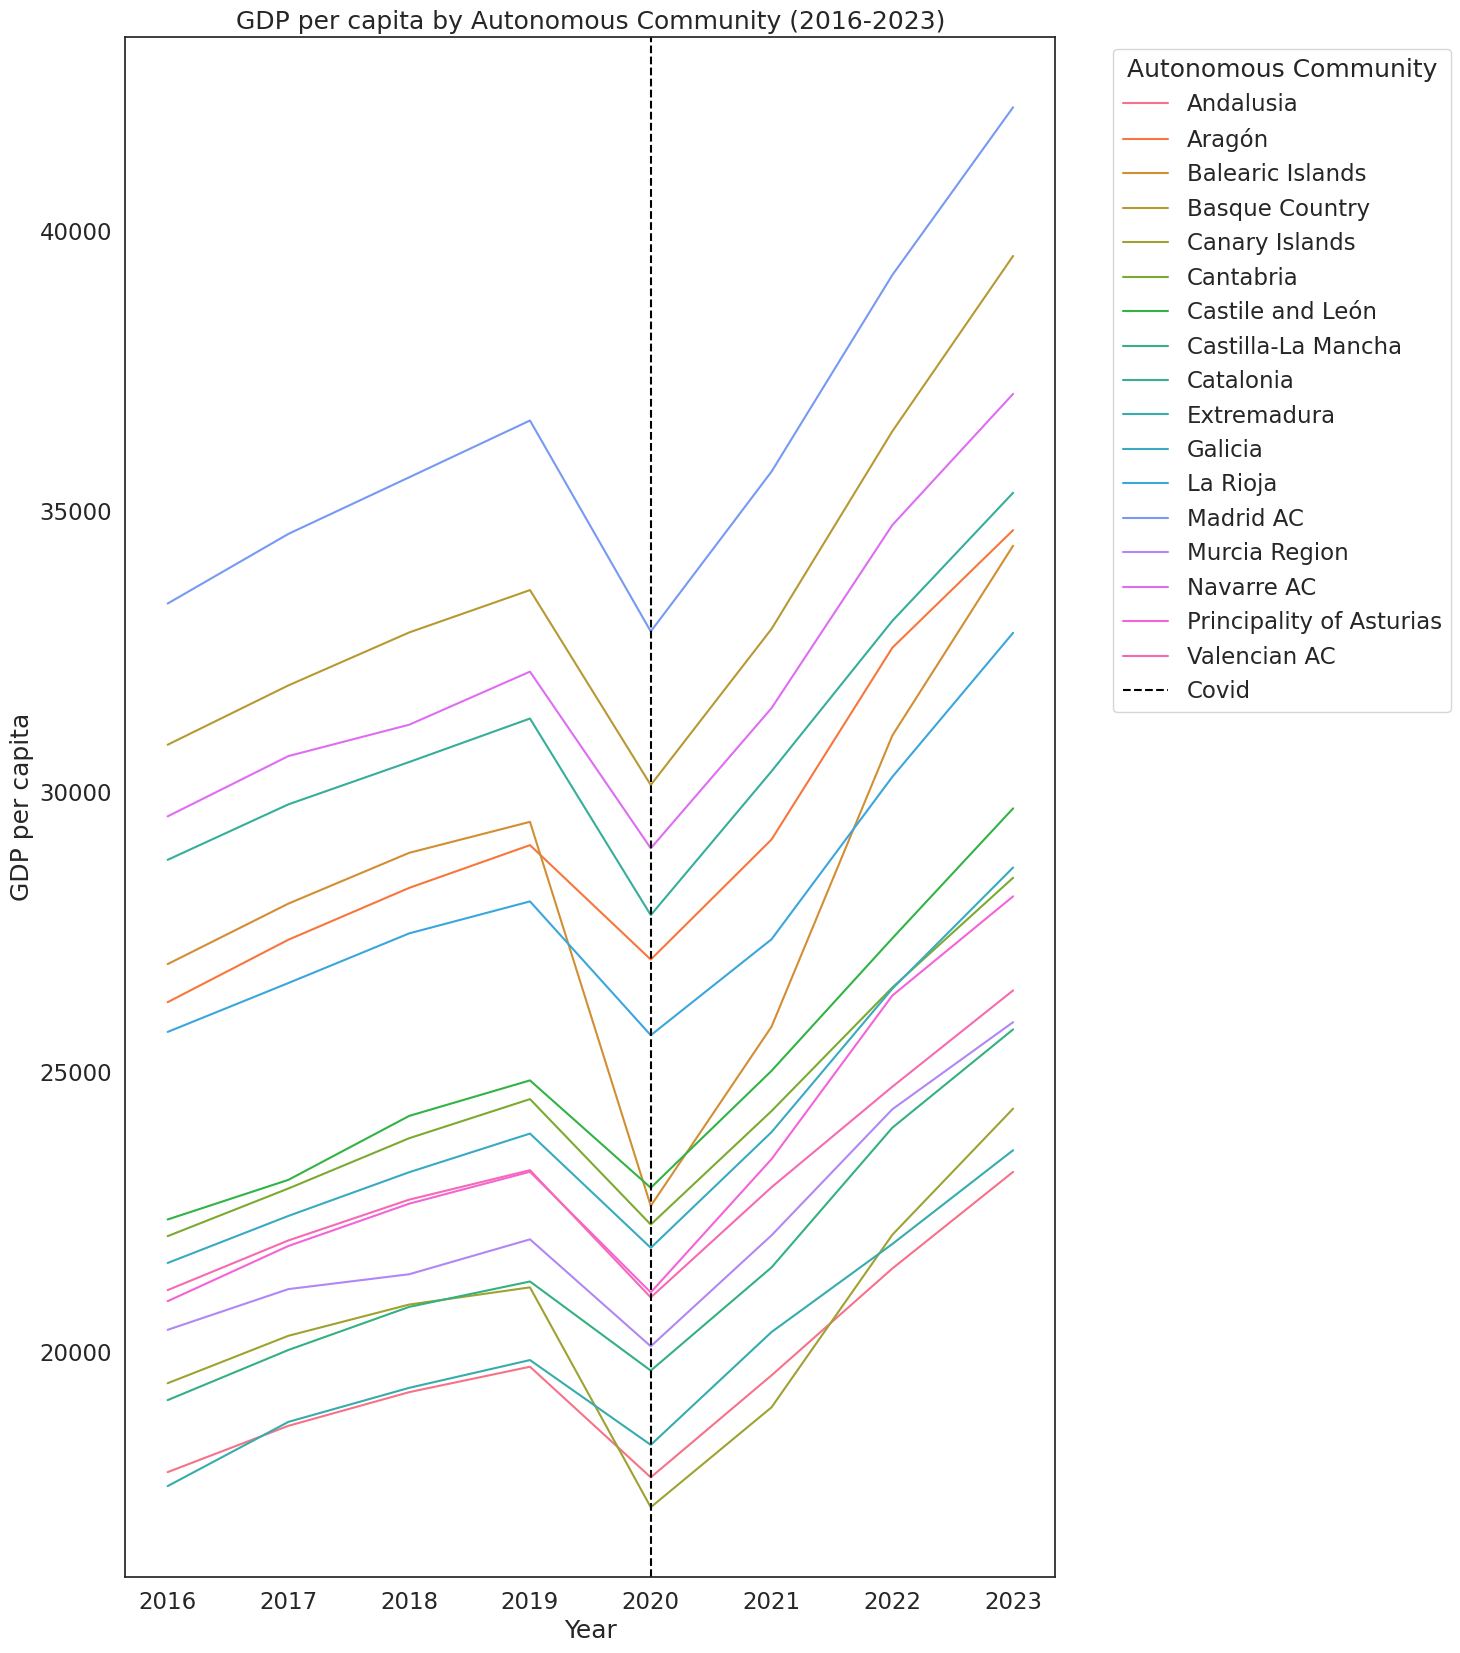

In [66]:
pylab.rcParams['figure.figsize'] = (12, 20)

sns.lineplot(data=df_fully_filtered[df_fully_filtered['Autonomous Community'] != 'National Total'], x='Year', y='GDP per capita', hue='Autonomous Community')

# Customize the plot
plt.title('GDP per capita by Autonomous Community (2016-2023)')
plt.xlabel('Year')
plt.ylabel('GDP per capita')

# Highlight Covid
plt.axvline(x=2020,color='black',linestyle='dashed', label='Covid')

plt.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.figure(figsize=(12, 20))


# Display the plot
plt.show()

first observations:

*   spike in 2019 both in tourism and GDP per capita - what happened here?
*   obviously drop in 2020 due to covid
*   general upward trend in GDP before and after covid
*   upward trend in tourism before covid, downward after recovery
*   WHEN DID PROTESTS START?






